In [1]:
def singleton(clz):
    instances = {}

    def getinstance(*args, **kwargs):
        if clz not in instances:
            instances[clz] = clz(*args, **kwargs)

        return instances[clz]

    return getinstance


def Get_MyEnv():
    return MyEnv()


@singleton
class MyEnv:
    """
    Modify Env Parameter Here
    """
    PRODUCTION = 0
    TEST = 1
    DEV = 2
    LOCAL = 3
    env_oo = PRODUCTION
    env_cassandra = PRODUCTION
    env_api = TEST
    env_cfg = LOCAL
    env_model = LOCAL

    LogIPs = [('https://api.quanta-camp.com/SmartAQ/v1/CRUD/CreateSkillLogs',
               '350e0d11-86cb-4201-b6b4-32461e5aa834'),
              ('https://api.quanta-camp.com/SmartAQTest/v1/CRUD/CreateSkillLogs',
               '8e9bcde1-65c6-491f-be83-8014ec7b9c99'),
              ('https://api.quanta-camp.com/SmartAQDev/v1/CRUD/CreateSkillLogs',
               '54225dac-613c-4689-80eb-b226b2bc7b68'),
              ('https://api.quanta-camp.com/SmartAQDev/v1/CRUD/CreateSkillLogs',
               '54225dac-613c-4689-80eb-b226b2bc7b68')]

    cassandraIPs = ['192.168.95.122,192.168.95.127',
                    '192.168.0.90,192.168.0.91,192.168.0.92',
                    '192.168.0.90,192.168.0.91,192.168.0.92',
                    '192.168.0.90,192.168.0.91,192.168.0.92']

    GetUserOrganizationsInfoByUserIdIPs = [('https://api.quanta-camp.com/HRApi/GetUserOrganizationsInfoByUserId',
                                            'ddaf97bf-4679-42f2-8ef2-90a5ced6c171'),
                                           ('https://api.quanta-camp.com/HRApi/GetUserOrganizationsInfoByUserId',
                                            'ddaf97bf-4679-42f2-8ef2-90a5ced6c171'),
                                           ('https://api.quanta-camp.com/HRApi/GetUserOrganizationsInfoByUserId',
                                            'ddaf97bf-4679-42f2-8ef2-90a5ced6c171'),
                                           ('https://api.quanta-camp.com/HRApi/GetUserOrganizationsInfoByUserId',
                                            'ddaf97bf-4679-42f2-8ef2-90a5ced6c171')]

    config_path_local = '/usr/local/flaskApi/'
    ConfigPath_AQ = ['',
                     '',
                     '',
                     config_path_local]

    ConfigPath_SparkSubmit = ['app/',
                              'app/',
                              'app/',
                              config_path_local]

    # jieba_path_AQ = ("/jieba_data/dict_taiwan.txt," +
    #                  "/jieba_data/userdict.txt," +
    #                  "/jieba_data/dict.txt.big," +
    #                  "/jieba_data/dict.txt.small")
    # jieba_path_SparkSubmit = ("app/jieba_data/dict_taiwan.txt," +
    #                           "app/jieba_data/userdict.txt," +
    #                           "app/jieba_data/dict.txt.big," +
    #                           "app/jieba_data/dict.txt.small")
    # jieba_path_local = ("/home/charles/dataset/jieba/dataset_01/dict_taiwan.txt," +
    #                                 "/home/charles/dataset/jieba/dataset_01/userdict.txt," +
    #                                 "/home/charles/dataset/jieba/dataset_01/dict.txt.big," +
    #                                 "/home/charles/dataset/jieba/dataset_01/dict.txt.small")

    jieba_path_AQ = ("/jieba_data/dict_taiwan.txt")
    jieba_path_SparkSubmit = ("app/jieba_data/dict_taiwan.txt")
    jieba_path_local = ("/home/charles/dataset/jieba/dataset_01/dict_taiwan.txt")

    JiebaPath_AQ = [jieba_path_AQ,
                    jieba_path_AQ,
                    jieba_path_AQ,
                    jieba_path_local]

    JiebaPath_SparkSubmit = [jieba_path_SparkSubmit,
                             jieba_path_SparkSubmit,
                             jieba_path_SparkSubmit,
                             jieba_path_local]

    jieba_stopword_path_AQ = ("/jieba_data/stopwords.txt")
    jieba_stopword_path_SparkSubmit = ("app/jieba_data/stopwords.txt")
    jieba_stopword_path_local = ("/home/charles/dataset/jieba/dataset_01/stopwords.txt")

    JiebaStopwordPath_AQ = [jieba_stopword_path_AQ,
                            jieba_stopword_path_AQ,
                            jieba_stopword_path_AQ,
                            jieba_stopword_path_local]

    JiebaStopwordPath_SparkSubmit = [jieba_stopword_path_SparkSubmit,
                                     jieba_stopword_path_SparkSubmit,
                                     jieba_stopword_path_SparkSubmit,
                                     jieba_stopword_path_local]

    model_path_AQ = ("model/")
    model_path_SparkSubmit = ("app/model/")
    model_path_local = ("/home/charles/dataset/model/")

    ModelPath_AQ = [model_path_AQ,
                    model_path_AQ,
                    model_path_AQ,
                    model_path_local]

    ModelPath_SparkSubmit = [model_path_SparkSubmit,
                             model_path_SparkSubmit,
                             model_path_SparkSubmit,
                             model_path_local]

    env_log_api = LogIPs[env_api]
    env_cassandra = cassandraIPs[env_cassandra]
    env_user_organizations_api = GetUserOrganizationsInfoByUserIdIPs[env_api]

    """
    佈到AQ請用此路徑
    """
    # env_config_path = ConfigPath_AQ[env_cfg]
    # env_jieba_path = JiebaPath_AQ[env_cfg]
    # env_jieba_stopwords_path = JiebaStopwordPath_AQ[env_cfg]
    # env_model_path = ModelPath_AQ[env_cfg]

    """
    佈到spark-submit請用此路徑
    """
    env_config_path = ConfigPath_SparkSubmit[env_cfg]
    env_jieba_dict_path = JiebaPath_SparkSubmit[env_cfg]
    env_jieba_stopwords_path = JiebaStopwordPath_SparkSubmit[env_cfg]
    env_model_path = ModelPath_SparkSubmit[env_model]

    def __init__(self):
        print('MyEnv init....')


In [2]:
from cassandra.cluster import Cluster
from cassandra.policies import DCAwareRoundRobinPolicy
from cassandra.auth import PlainTextAuthProvider
from cassandra.query import BatchStatement
import pandas as pd


class envCassandraDAO():

    # you have to install following items :
    # a. python-Cassandra Connector
    # b. sqlJDBC.jars    

    def __init__(self, points):
        try:
            print('hey inital envCassandraDAO')
            print(points.split(','))

            self.contact_points = points.split(',')
            print(points.split(','))
            self.contact_points_str = points

            self.formatString = "org.apache.spark.sql.cassandra"
            self.username = "username"
            self.password = "password"
            self.cluster = None
            self.session = None
            self.createSession()
        except Exception as exp:
            print(str(exp))

    def __del__(self):
        self.cluster.shutdown()

    def pandas_factory(self, colnames, rows):
        return pd.DataFrame(rows, columns=colnames)

    def createSession(self):
        print "contact_points = " + self.contact_points_str
        self.cluster = Cluster(
            contact_points=self.contact_points, #random select a node
#             load_balancing_policy = DCAwareRoundRobinPolicy(local_dc='datacenter1'),
    #         auth_provider = PlainTextAuthProvider(username='cassandra', password='cassandra')
        )
        self.session = self.cluster.connect()
        self.session.row_factory = self.pandas_factory
        self.session.default_fetch_size = 10000000 #needed for large queries, otherwise driver will do pagination. Default is 50000.  

    def getSession(self):
        return self.session

    def execCQL(self, keyspace, cql):
        """
        execute CQL
        """
        self.session.set_keyspace(keyspace)
        self.session.execute_async(cql)

    def execCQLSelect(self, keyspace, cql):
        """
        execute CQL, select only
        """

        self.session.set_keyspace(keyspace)

#       cassandra ResultSet
        async_results = self.session.execute_async(cql)
        return async_results

    def execCQLCallBackAnysc(self, keyspace, cql, handle_success, handle_error):
        """
        execute CQL, if success => handle_success function, else handle_error
        """
        self.session.set_keyspace(keyspace)
        async_results = self.session.execute_async(cql)
        async_results.add_callbacks(handle_success, handle_error)

    def execCQLSelectToPandasDF(self, keyspace, cql):
        """
        execute CQL, select only, return Pandas DataFrame
        """

        self.session.set_keyspace(keyspace)

#       cassandra ResultSet
        async_results = self.session.execute_async(cql)
#         async_results = self.session.execute_async(cql)
#       to Pandas DataFrame
        return async_results.result()._current_rows

#    def execCQLSelectToDF(self, sqlContext, keyspace, cql):
        """
        execute CQL, select only, return Spark DataFrame
        """

#       pandas dataframe to spark dataframe
#        pandas_dataframe = self.execCQLSelectToPandasDF(keyspace, cql)
#        if pandas_dataframe.empty:
#            schema = StructType([])
#            return sqlContext.createDataFrame([],schema)
#        else:
#            return sqlContext.createDataFrame(pandas_dataframe)

    def execCQLSelectToRDD(self, sqlContext, keyspace, cql):
        """
        execute CQL, select only, return Spark RDD
        """

        return self.execCQLSelectToDF(sqlContext, keyspace, cql).rdd.map(tuple)#dataFrame to RDD

    @property
    def contactPoints(self):
        return self.contact_points

    @contactPoints.setter
    def contactPoints(self, contact_points):
        self.contact_points = contact_points

    @contactPoints.deleter
    def contactPoints(self):
        del self.contact_points

# pyspark cassandra connector
    def readFromCassandraDF(self, sqlContext, keyspace, table):
        """
        read data from Cassandra, return Dataframe
        """

        return sqlContext.read\
                        .format(self.formatString)\
                        .options(table=table, keyspace=keyspace)\
                        .option("spark.cassandra.connection.host",self.contact_points_str)\
                        .load()

    def readFromCassandraRDD(self, sqlContext, keyspace, table):
        """
        read data from Cassandra, return RDD
        """

        df =  sqlContext.read\
                        .format(self.formatString)\
                        .options(table=table, keyspace=keyspace)\
                        .option("spark.cassandra.connection.host",self.contact_points_str)\
                        .load()
        return df.rdd.map(tuple)#dataFrame to RDD

    def saveToCassandraDF(self, dataFrame, keyspace, table, mode="error"):
        """
        Save data to Cassandra using DataFrame, select one mode to save

        SaveMode.ErrorIfExists (default) | "error"      When saving a DataFrame to a data source,
                                                        if data already exists, an exception is expected to be thrown.
        SaveMode.Append                  | "append"     When saving a DataFrame to a data source,
                                                        if data/table already exists, contents of the DataFrame are expected to be appended to existing data.
        SaveMode.Overwrite               | "overwrite"  Overwrite mode means that when saving a DataFrame to a data source,
                                                        if data/table already exists, existing data is expected to be overwritten by the contents of the DataFrame.
        SaveMode.Ignore                  | "ignore"     Ignore mode means that when saving a DataFrame to a data source,
                                                        if data already exists, the save operation is expected to not save the contents of the DataFrame and to not change the existing data. This is similar to a CREATE TABLE IF NOT EXISTS in SQL.
        """

        dataFrame.write\
                .format(self.formatString)\
                .mode(mode)\
                .options(table=table, keyspace=keyspace)\
                .option("spark.cassandra.connection.host",self.contact_points_str)\
                .save()

##     use : DAO(10)
#     def __call__(self, radius):
#         if radius <= 0:
#             print('必須是正數')
#         else:
#             self.radius = radius


In [3]:
from cassandra.cluster import Cluster
from cassandra.policies import DCAwareRoundRobinPolicy
from cassandra.auth import PlainTextAuthProvider
from cassandra.query import BatchStatement
import pandas as pd


class envCassandraDAO():

    # you have to install following items :
    # a. python-Cassandra Connector
    # b. sqlJDBC.jars    

    def __init__(self, points):
        try:
            print('hey inital envCassandraDAO')
            print(points.split(','))

            self.contact_points = points.split(',')
            print(points.split(','))
            self.contact_points_str = points

            self.formatString = "org.apache.spark.sql.cassandra"
            self.username = "username"
            self.password = "password"
            self.cluster = None
            self.session = None
            self.createSession()
        except Exception as exp:
            print(str(exp))

    def __del__(self):
        self.cluster.shutdown()

    def pandas_factory(self, colnames, rows):
        return pd.DataFrame(rows, columns=colnames)

    def createSession(self):
        print "contact_points = " + self.contact_points_str
        self.cluster = Cluster(
            contact_points=self.contact_points, #random select a node
#             load_balancing_policy = DCAwareRoundRobinPolicy(local_dc='datacenter1'),
    #         auth_provider = PlainTextAuthProvider(username='cassandra', password='cassandra')
        )
        self.session = self.cluster.connect()
        self.session.row_factory = self.pandas_factory
        self.session.default_fetch_size = 10000000 #needed for large queries, otherwise driver will do pagination. Default is 50000.  

    def getSession(self):
        return self.session

    def execCQL(self, keyspace, cql):
        """
        execute CQL
        """
        self.session.set_keyspace(keyspace)
        self.session.execute_async(cql)

    def execCQLSelect(self, keyspace, cql):
        """
        execute CQL, select only
        """

        self.session.set_keyspace(keyspace)

#       cassandra ResultSet
        async_results = self.session.execute_async(cql)
        return async_results

    def execCQLCallBackAnysc(self, keyspace, cql, handle_success, handle_error):
        """
        execute CQL, if success => handle_success function, else handle_error
        """
        self.session.set_keyspace(keyspace)
        async_results = self.session.execute_async(cql)
        async_results.add_callbacks(handle_success, handle_error)

    def execCQLSelectToPandasDF(self, keyspace, cql):
        """
        execute CQL, select only, return Pandas DataFrame
        """

        self.session.set_keyspace(keyspace)

#       cassandra ResultSet
        async_results = self.session.execute_async(cql)
#         async_results = self.session.execute_async(cql)
#       to Pandas DataFrame
        return async_results.result()._current_rows

#    def execCQLSelectToDF(self, sqlContext, keyspace, cql):
        """
        execute CQL, select only, return Spark DataFrame
        """

#       pandas dataframe to spark dataframe
#        pandas_dataframe = self.execCQLSelectToPandasDF(keyspace, cql)
#        if pandas_dataframe.empty:
#            schema = StructType([])
#            return sqlContext.createDataFrame([],schema)
#        else:
#            return sqlContext.createDataFrame(pandas_dataframe)

    def execCQLSelectToRDD(self, sqlContext, keyspace, cql):
        """
        execute CQL, select only, return Spark RDD
        """

        return self.execCQLSelectToDF(sqlContext, keyspace, cql).rdd.map(tuple)#dataFrame to RDD

    @property
    def contactPoints(self):
        return self.contact_points

    @contactPoints.setter
    def contactPoints(self, contact_points):
        self.contact_points = contact_points

    @contactPoints.deleter
    def contactPoints(self):
        del self.contact_points

# pyspark cassandra connector
    def readFromCassandraDF(self, sqlContext, keyspace, table):
        """
        read data from Cassandra, return Dataframe
        """

        return sqlContext.read\
                        .format(self.formatString)\
                        .options(table=table, keyspace=keyspace)\
                        .option("spark.cassandra.connection.host",self.contact_points_str)\
                        .load()

    def readFromCassandraRDD(self, sqlContext, keyspace, table):
        """
        read data from Cassandra, return RDD
        """

        df =  sqlContext.read\
                        .format(self.formatString)\
                        .options(table=table, keyspace=keyspace)\
                        .option("spark.cassandra.connection.host",self.contact_points_str)\
                        .load()
        return df.rdd.map(tuple)#dataFrame to RDD

    def saveToCassandraDF(self, dataFrame, keyspace, table, mode="error"):
        """
        Save data to Cassandra using DataFrame, select one mode to save

        SaveMode.ErrorIfExists (default) | "error"      When saving a DataFrame to a data source,
                                                        if data already exists, an exception is expected to be thrown.
        SaveMode.Append                  | "append"     When saving a DataFrame to a data source,
                                                        if data/table already exists, contents of the DataFrame are expected to be appended to existing data.
        SaveMode.Overwrite               | "overwrite"  Overwrite mode means that when saving a DataFrame to a data source,
                                                        if data/table already exists, existing data is expected to be overwritten by the contents of the DataFrame.
        SaveMode.Ignore                  | "ignore"     Ignore mode means that when saving a DataFrame to a data source,
                                                        if data already exists, the save operation is expected to not save the contents of the DataFrame and to not change the existing data. This is similar to a CREATE TABLE IF NOT EXISTS in SQL.
        """

        dataFrame.write\
                .format(self.formatString)\
                .mode(mode)\
                .options(table=table, keyspace=keyspace)\
                .option("spark.cassandra.connection.host",self.contact_points_str)\
                .save()

##     use : DAO(10)
#     def __call__(self, radius):
#         if radius <= 0:
#             print('必須是正數')
#         else:
#             self.radius = radius


In [4]:
# from cassandra.cluster import Cluster
# from cassandra.policies import DCAwareRoundRobinPolicy
# from cassandra.auth import PlainTextAuthProvider
# from cassandra.query import BatchStatement
# import pandas as pd

# class CassandraType(object):
#     PRODUCTION = 0
#     TEST = 1
#     TEST_DOCKER = 2


# class CassandraDAO(object):

#     # you have to install following items :
#     # a. python-Cassandra driver
#     # b. pyspark cassandra connector

#     def __init__(self, type):
#         print('init CassandraDAO')
#         if type == CassandraType.PRODUCTION:
#             self.contact_points = ['192.168.95.127', '192.168.95.122']
#             self.contact_points_str = "192.168.95.127,192.168.95.122"
#         elif type == CassandraType.TEST:
#             self.contact_points = ['192.168.0.41', '192.168.0.42']
#             self.contact_points_str = "192.168.0.41,192.168.0.42"
#         else:
#             self.contact_points = ['192.168.0.121', '192.168.0.122', '192.168.0.52']
#             self.contact_points_str = "192.168.0.121,192.168.0.122,192.168.0.52"

#         self.formatString = "org.apache.spark.sql.cassandra"
#         self.username = "username"
#         self.password = "password"
#         self.cluster = None
#         self.session = None
#         self.createSession()

#     def __del__(self):
#         self.cluster.shutdown()

#     def pandas_factory(self, colnames, rows):
#         return pd.DataFrame(rows, columns=colnames)

#     def createSession(self):
#         print ("contact_points = " + self.contact_points_str)
#         self.cluster = Cluster(
#             contact_points=self.contact_points,  # random select a node
#             #             load_balancing_policy = DCAwareRoundRobinPolicy(local_dc='datacenter1'),
#             #         auth_provider = PlainTextAuthProvider(username='cassandra', password='cassandra')
#         )
#         self.session = self.cluster.connect()
#         self.session.row_factory = self.pandas_factory
#         self.session.default_fetch_size = 10000000
#         # needed for large queries, otherwise driver will do pagination. Default is 50000.

#     def getSession(self):
#         return self.session

#     def execCQL(self, keyspace, cql):
#         """
#         execute CQL
#         """
#         self.session.set_keyspace(keyspace)
#         self.session.execute_async(cql)

#     def execCQLSelect(self, keyspace, cql):
#         """
#         execute CQL, select only
#         """

#         self.session.set_keyspace(keyspace)

#         #       cassandra ResultSet
#         async_results = self.session.execute_async(cql)
#         return async_results

#     def execCQLCallBackAnysc(self, keyspace, cql, handle_success, handle_error):
#         """
#         execute CQL, if success => handle_success function, else handle_error
#         """
#         self.session.set_keyspace(keyspace)
#         async_results = self.session.execute_async(cql)
#         async_results.add_callbacks(handle_success, handle_error)

#     def execCQLSelectToPandasDF(self, keyspace, cql):
#         """
#         execute CQL, select only, return Pandas DataFrame
#         """

#         self.session.set_keyspace(keyspace)

#         #       cassandra ResultSet
#         async_results = self.session.execute_async(cql)
#         #         async_results = self.session.execute_async(cql)
#         #       to Pandas DataFrame
#         return async_results.result()._current_rows

#     def execCQLSelectToDF(self, sqlContext, keyspace, cql):
#         """
#         execute CQL, select only, return Spark DataFrame
#         """

#         #       pandas dataframe to spark dataframe
#         pandas_dataframe = self.execCQLSelectToPandasDF(keyspace, cql)
#         if pandas_dataframe.empty:
#             schema = StructType([])
#             return sqlContext.createDataFrame([], schema)
#         else:
#             return sqlContext.createDataFrame(pandas_dataframe)

#     def execCQLSelectToRDD(self, sqlContext, keyspace, cql):
#         """
#         execute CQL, select only, return Spark RDD
#         """

#         return self.execCQLSelectToDF(sqlContext, keyspace, cql).rdd.map(tuple)  # dataFrame to RDD

#     @property
#     def contactPoints(self):
#         return self.contact_points

#     @contactPoints.setter
#     def contactPoints(self, contact_points):
#         self.contact_points = contact_points

#     @contactPoints.deleter
#     def contactPoints(self):
#         del self.contact_points

In [5]:
# CASSANDRA_ENV = CassandraType.PRODUCTION
# c_dao = CassandraDAO(CASSANDRA_ENV)
# HELPER_TEST_KEYSPACE='helper_test_keyspace'

# 1. Import Library

# 資料準備

In [6]:

from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import MultinomialNB
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score , roc_auc_score , roc_curve

In [7]:
from keras.preprocessing import sequence
from keras.preprocessing.text import Tokenizer
from keras.models import Sequential, load_model
from keras.layers.core import Dense, Dropout, Activation,Flatten
from keras.layers import Conv1D, GlobalMaxPooling1D,MaxPooling1D
from keras.layers.embeddings import Embedding
from keras.layers.wrappers import Bidirectional
from keras.callbacks import EarlyStopping, ReduceLROnPlateau, ModelCheckpoint, TensorBoard
from keras.optimizers import adam, RMSprop
from keras.layers.recurrent import LSTM, GRU, SimpleRNN
from keras.layers import Dense, Dropout, Embedding, Input, merge, Reshape, Concatenate
from keras.layers import Conv2D, MaxPool2D, Embedding
from keras.utils import np_utils, generic_utils
from keras import optimizers, metrics
from keras.models import Model


from datetime import datetime

import pickle
import numpy as np
import json
import requests
import pandas as pd
pd.set_option('max_colwidth', 100)

# import urllib.request
import os
import tarfile
np.random.seed(10)


Using TensorFlow backend.


In [8]:
from hyperopt import Trials, STATUS_OK, tpe
from hyperas import optim
from hyperas.distributions import choice, uniform

In [9]:
# os.chdir("../")
# os.getcwd()

In [10]:
# if not os.path.exists(data_path + "/aclImdb"): 
#     tfile = tarfile.open(data_path + "/aclImdb_v1.tar.gz", 'r:gz')
#     result=tfile.extractall(data_path)

In [11]:
# import re
# re_tag = re.compile(r'<[^>]+>')

# def rm_tags(text):
#     return re_tag.sub('', text)

In [12]:
# import os
# def read_files(filetype):
#     path = data_path + "/aclImdb/" #"data/aclImdb/"
#     file_list=[]

#     positive_path=path + filetype+"/pos/"
#     for f in os.listdir(positive_path):
#         file_list+=[positive_path+f]
    
#     negative_path=path + filetype+"/neg/"
#     for f in os.listdir(negative_path):
#         file_list+=[negative_path+f]
        
#     print('read',filetype, 'files:',len(file_list))
       
#     all_labels = ([1] * 12500 + [0] * 12500) 
    
#     all_texts  = []
    
#     for fi in file_list:
#         with open(fi) as file_input: #with open(fi,encoding='utf8') as file_input:
#             all_texts += [rm_tags(" ".join(file_input.readlines()))]
            
#     return all_labels,all_texts

In [13]:
# row_train_data,row_train_text=read_files("train")

In [14]:
# type(row_train_data),type(row_train_text)

In [15]:
# row_train_data[0],row_train_text[0]

In [16]:
# y_test,test_text=read_files("test")

In [17]:
from collections import namedtuple
import pandas as pd
import jieba
import jieba.posseg as pseg


class JiebaSegmentor:

    def __init__(self, dict_path, userdict=[], stopwords=False, stopwords_path=None):
        self.dict_path = dict_path
        self.userdict = userdict
        self.dictionary_init()
        self.stopwords_path = stopwords_path
        self.stopwords = stopwords
        self.stopwords_set = set()
        self.stopwords_init()

    def dictionary_init(self):
        jieba.set_dictionary(self.dict_path)
        for path in self.userdict:
            print(path)
            jieba.load_userdict(path)

    def stopwords_init(self):
        if self.stopwords_path:
            with open(self.stopwords_path, 'r') as stopwords:
                for stopword in stopwords:
                    self.stopwords_set.add(stopword.strip('\n').decode('utf-8'))

    def taiwan_country(self):
        return [u'臺北', u'台北', u'基隆', u'臺中', u'台中', u'臺南', u'台南', u'高雄',
                u'宜蘭', u'桃園', u'新竹', u'苗栗', u'彰化', u'南投', u'嘉義', u'雲林',
                u'屏東', u'臺東', u'台東', u'花蓮', u'澎湖']

    def wordToNumber(self, input_text):

        target = u''
        for s in input_text:

            if (s == u'零') or (s == '0'):
                to_word = u'0'
            elif (s == u'一') or (s == u'壹') or (s == '1'):
                to_word = u'1'
            elif (s == u'二') or (s == u'兩') or (s == u'貳') or (s == '2'):
                to_word = u'2'
            elif (s == u'三') or (s == u'參') or (s == '3'):
                to_word = u'3'
            elif (s == u'四') or (s == u'肆') or (s == '4'):
                to_word = u'4'
            elif (s == u'五') or (s == u'伍') or (s == '5'):
                to_word = u'5'
            elif (s == u'六') or (s == u'陸') or (s == '6'):
                to_word = u'6'
            elif (s == u'七') or (s == u'柒') or (s == '7'):
                to_word = u'7'
            elif (s == u'八') or (s == u'捌') or (s == '8'):
                to_word = u'8'
            elif (s == u'九') or (s == u'玖') or (s == '9'):
                to_word = u'9'
            else:
                to_word = s

        target = target + to_word
        return target

    def input_text_preprocessing(self, input_text):

        if type(input_text) is not unicode:
            input_text = input_text.decode('utf-8')

        #         input_text = self.wordToNumber(input_text)
        return input_text

    def get_names(self, input_text):
        """
        取得姓名
        :param input_text:
        :return:
        """

        input_text = self.input_text_preprocessing(input_text)
        names = []
        words = pseg.cut(input_text)
        print(words)
        for w, f in words:
            if f.lower() == 'nr':
                names.append(w)
        for name in names:
            print(name.encode('utf-8'))
        return names

    def lcut(self, input_text, return_type='pandas'):
        """
        斷詞
        :param input_text:
        :param return_type:
        :return: pandas
        """

        input_text = self.input_text_preprocessing(input_text)
        cut_raw = jieba.lcut(input_text)
        key = []

        for k in cut_raw:
            if self.stopwords:
                if k in self.stopwords_set:
                    continue

            key.append(k)

        result = pd.DataFrame({"word": key})
        if return_type == 'pandas':
            return result
        elif return_type == 'dict':
            return result.to_dict('index').values()
        else:
            return result

    def pseg_lcut(self, input_text, return_type='pandas'):
        """
        斷詞+詞性
        :param input_text:
        :param return_type:
        :return: pandas
        """

        input_text = self.input_text_preprocessing(input_text)
        cut_raw = pseg.lcut(input_text)
        key = []
        value = []

        for k, v in cut_raw:
            tag = v
            if self.stopwords:
                if k in self.stopwords_set:
                    continue

            if k in self.taiwan_country():
                tag = u'ns'
            if len(k) > 1 and tag == u'x':
                tag = u'n'
            key.append(k)
            value.append(tag)

        result = pd.DataFrame({"word": key, "tag": value})
        if return_type == 'pandas':
            return result
        elif return_type == 'dict':
            return result.to_dict('index').values()
        else:
            return result

    def pseg_lcut_combie_num_eng(self, input_text, return_type='pandas'):
        """
        將數字與英文結合成同一欄位
        :param input_text:
        :param return_type:
        :return: pandas
        """

        input_text = self.input_text_preprocessing(input_text)
        seg_pd = self.pseg_lcut(input_text)
        seg_dict_list = []
        m_eng_list = []
        CombieTuple = namedtuple('CombieTuple', {
            'index',
            'word',
            'sp'})

        for index, seg in seg_pd.iterrows():
            #     print type(seg)
            #     print seg
            seg_dict = {
                "word": seg['word'],
                "sp": seg['tag']
            }

            if seg['tag'] == 'm':
                #         m_eng_dict.update(seg_dict)
                combie_tuple = CombieTuple(
                    index=index,
                    word=seg['word'],
                    sp=seg['tag']
                )
                m_eng_list.append(combie_tuple)
            #             continue

            if seg['tag'] == 'eng':
                if m_eng_list:
                    if m_eng_list[0].index + 1 == index:
                        seg_dict = {
                            "word": m_eng_list[0].word + seg['word'],
                            "sp": m_eng_list[0].sp + '+' + seg['tag']
                        }
                        m_eng_list = []
                        del seg_dict_list[index - 1]

            seg_dict_list.append(seg_dict)

        if return_type == 'pandas':
            return pd.DataFrame(seg_dict_list)
        elif return_type == 'dict':
            return seg_dict_list
        else:
            return pd.DataFrame(seg_dict_list)


In [18]:
jieba_data_set = 'dataset_02'
jieba_dict_path1 = "/home/charles/dataset/jieba/" + jieba_data_set +  "/dict_taiwan.txt"
jieba_dict_path2 = "/home/charles/dataset/jieba/" + jieba_data_set +  "/userdict.txt"
jieba_dict_path3 = "/home/charles/dataset/jieba/" + jieba_data_set +  "/dict.txt.big"
jieba_dict_path4 = "/home/charles/dataset/jieba/" + jieba_data_set +  "/dict.txt.small"
jieba_stopwords_path = "/home/charles/dataset/jieba/" + jieba_data_set +  "/stopwords.txt"

js = JiebaSegmentor(dict_path=jieba_dict_path1,
                    userdict=[],
                    stopwords=False,
                    stopwords_path=jieba_stopwords_path)
# js = JiebaSegmentor(jieba_dict_path1, [jieba_dict_path2, jieba_dict_path3, jieba_dict_path4])

In [19]:
# test_cut_raw_0 = js.lcut('北京在哪呢', cut_type='df')
# # test_cut_raw_0
# for x in test_cut_raw_0:
#     print (x)

In [20]:
test_cut_raw_0 = js.pseg_lcut('打分機給sandy')
test_cut_raw_0

Building prefix dict from /home/charles/dataset/jieba/dataset_02/dict_taiwan.txt ...
DEBUG:jieba:Building prefix dict from /home/charles/dataset/jieba/dataset_02/dict_taiwan.txt ...
Loading model from cache /tmp/jieba.uc7e0f43f50d825489eed13ef9e4d17b7.cache
DEBUG:jieba:Loading model from cache /tmp/jieba.uc7e0f43f50d825489eed13ef9e4d17b7.cache
Loading model cost 0.431 seconds.
DEBUG:jieba:Loading model cost 0.431 seconds.
Prefix dict has been built succesfully.
DEBUG:jieba:Prefix dict has been built succesfully.


,tag,word
0,v,打
1,n,分機
2,p,給
3,eng,sandy


In [21]:
from tensorflow.python.client import device_lib
print(device_lib.list_local_devices())

[name: "/device:CPU:0"
device_type: "CPU"
memory_limit: 268435456
locality {
}
incarnation: 10019333316045531365
]


In [22]:
#先讀取所有文章建立字典，限制字典的數量為nb_words=2000

In [23]:
# df_train = pd.read_csv('data/intent_data/intent_train.csv')
# df_test = pd.read_csv('data/intent_data/intent_test.csv')
df_all = pd.read_csv('data/intent_data/OA_robot_intent_train_data_simple_4.csv')

In [24]:
# robot_id = "hr.00001318"
# model_id = "model_intent.h5"
# min_confidence = 0.9

# HELPER_KEYSPACE = "helper_keyspace"
# HELPER_INTENT_MAPPING_TABLE = "intent_model_data"
# HELPER_INTENT_TRAINING_DATA_TABLE = "intent_training_data"

# c_dao = envCassandraDAO(Get_MyEnv().env_cassandra)

In [25]:
# """
# 與訓練句子比對
# """
# cql = ("select skill_id,sentence from " + HELPER_INTENT_TRAINING_DATA_TABLE +
#        " where robot_id = '" + robot_id + "';")
# df_all = c_dao.execCQLSelectToPandasDF(HELPER_KEYSPACE, cql)
# df_all

In [26]:
print('total : {}'.format(len(df_all)))
print('weather : {}'.format(len(df_all[df_all.target == 'weather'])))
print('phone : {}'.format(len(df_all[df_all.target == 'phone'])))
print('leave : {}'.format(len(df_all[df_all.target == 'leave'])))

total : 105
weather : 36
phone : 34
leave : 35


In [27]:
# np.random.shuffle(df_all)

In [28]:
df_all = df_all.sample(frac=1).reset_index(drop=True)
# df_all = pd.concat([df_train,df_test], axis = 0, ignore_index = False)
print(df_all.head())

# index to categories mapping
mapping = df_all.target.astype('category').cat.categories
print('mapping : ')
print(mapping)
print('mapping type : ')
print(type(mapping))
mapping_list = list(mapping)
print('mapping_list : ')
print(mapping_list)

  sentence   target
0  有事無法去公司    leave
1       天氣  weather
2     聯絡電話    phone
3     風大不大  weather
4    打MVPN    phone
mapping : 
Index([u'leave', u'phone', u'weather'], dtype='object')
mapping type : 
<class 'pandas.core.index.Index'>
mapping_list : 
['leave', 'phone', 'weather']


In [29]:
def cut_to_word(s):
    """
    將句子使用逗號分割, 方便 tokenizer斷詞
    :param _s:
    :return:
    """
    w_df = js.lcut(s, return_type='pandas')
    combie = ''
    for i,w in w_df.iterrows():
        combie = combie + w
        if i < len(w_df) - 1:
            combie = combie + ','
            
    return combie    

print (cut_to_word('可以幫我聯絡'.strip()))
df_all['cut_words'] = df_all['sentence'].apply(lambda s: cut_to_word(s.strip()))

word    可以,幫,我,聯絡
dtype: object


In [30]:
import re
def trim(sentence):
    return re.sub('\s','',sentence)

df_all['sentence'] = df_all['sentence'].apply(lambda s: trim(s))

In [31]:
def get_loc(target):
    return mapping.get_loc(target)    

df_all['target_index'] = df_all['target'].apply(lambda s: get_loc(s))

In [32]:
df_all.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 105 entries, 0 to 104
Data columns (total 4 columns):
sentence        105 non-null object
target          105 non-null object
cut_words       105 non-null object
target_index    105 non-null int64
dtypes: int64(1), object(3)
memory usage: 4.1+ KB


In [33]:
df_all

,sentence,target,cut_words,target_index
0,有事無法去公司,leave,"有事,無法,去,公司",0
1,天氣,weather,天氣,2
2,聯絡電話,phone,"聯絡,電話",1
3,風大不大,weather,"風大,不大",2
4,打MVPN,phone,"打,MVPN",1
5,查個電話,phone,"查個,電話",1
6,phone,phone,phone,1
7,聯絡同事,phone,"聯絡,同事",1
8,打個電話,phone,"打個,電話",1
9,寫假單,leave,"寫,假單",0


In [34]:
x_all = df_all.cut_words
y_all = df_all.target_index 

y_all_one_hot = np_utils.to_categorical(y_all)
print (y_all_one_hot[0])
# 總共類別數
num_classes = len((y_all_one_hot[0]))
print ('num_classes = {}'.format(num_classes))

[1. 0. 0.]
num_classes = 3


In [35]:
# 標點符號過濾
WORD_FILTERS = '!"#$&()*+,-./:;<=>?@[\\]^_{|}~\t\n'
# # 字典數量 1+最大單字數
NUM_WORDS = 500
# 向量長度 - 取最長的單字向量長度
MAX_LEN = 10
# sentence_max_len = max(len(row['cut_words'].split(',')) \
#               for index,row in pd.concat([df_train,df_test], axis = 0, ignore_index = False).iterrows())

print('max_len : {}'.format(MAX_LEN))

tokenizer_intent = Tokenizer(filters=WORD_FILTERS,
                             num_words=NUM_WORDS,
                             split=",")

# 斷詞後全部合併丟到fit_on_texts,組出字典
tokenizer_intent.fit_on_texts(x_all)
# tokenizer_intent.fit_on_texts(x_train)
# tokenizer_intent.fit_on_texts(x_test)
# # 字典數量 = 1+最大單字數
# num_words = len(tokenizer_intent.word_index) + 1
# print(num_words)

# saving
with open('model/tokenizer_intent.pickle', 'wb') as handle:
    pickle.dump(tokenizer_intent, handle, protocol=pickle.HIGHEST_PROTOCOL)
    
# # loading
# with open('model/tokenizer_intent.pickle', 'rb') as handle:
#     tokenizer_intent = pickle.load(handle)

def preprocessing(x, max_len):
    """
    將文字轉為數字序列
    截長補短，讓文字所產生的數字序列長度一樣
    :param cut_words: 
    :param max_len: 
    :return: 
    """

    #將文字轉為數字序列
    train_seq_intent = tokenizer_intent.texts_to_sequences(x)

    # 截長補短，讓所有影評所產生的數字序列長度一樣
    data = sequence.pad_sequences(train_seq_intent, maxlen=max_len)
    # print train_data_intent.shape
    return data

x_all = preprocessing(x_all, max_len=MAX_LEN)

max_len : 10


# 建立模型

In [36]:
def build_2dcnn_model(num_classes, vocab_size, sentence_max_len, 
                      embedding_output_dim=256, filter_sizes=[2, 3, 5], num_filters = 512, drop = 0.5):
    """

    :param num_classes: 
    :param vocab_size: 
    :param sentence_max_len: 
    :param embedding_output_dim: 
    :param filter_sizes: 
    :param num_filters: 
    :param drop: 
    :return: 
    """

    inputs = Input(shape=(sentence_max_len,), dtype='int32')
    embedding = Embedding(input_dim=vocab_size + 1,
                          output_dim=embedding_output_dim,
                          input_length=sentence_max_len,
                          trainable=False)(inputs)

    reshape = Reshape((sentence_max_len, embedding_output_dim, 1))(embedding)

    conv_0 = Conv2D(num_filters, kernel_size=(filter_sizes[0], embedding_output_dim),
                    padding='valid', kernel_initializer='normal', activation='relu')(reshape)
    conv_1 = Conv2D(num_filters, kernel_size=(filter_sizes[1], embedding_output_dim),
                    padding='valid', kernel_initializer='normal', activation='relu')(reshape)
    conv_2 = Conv2D(num_filters, kernel_size=(filter_sizes[2], embedding_output_dim),
                    padding='valid', kernel_initializer='normal', activation='relu')(reshape)

    maxpool_0 = MaxPool2D(pool_size=(sentence_max_len - filter_sizes[0] + 1, 1),
                          strides=(1, 1), padding='valid')(conv_0)
    maxpool_1 = MaxPool2D(pool_size=(sentence_max_len - filter_sizes[1] + 1, 1),
                          strides=(1, 1), padding='valid')(conv_1)
    maxpool_2 = MaxPool2D(pool_size=(sentence_max_len - filter_sizes[2] + 1, 1),
                          strides=(1, 1), padding='valid')(conv_2)

    concatenated_tensor = Concatenate(axis=1)([maxpool_0, maxpool_1, maxpool_2])
    flatten = Flatten()(concatenated_tensor)
    dropout = Dropout(drop)(flatten)
    preds = Dense(num_classes, activation='softmax')(dropout)

    # this creates a model that includes inputs and outputs
    model = Model(inputs=inputs, outputs=preds)

    # model.summary()
    return model

In [37]:
import keras.layers as L
import keras
def build_text_cnn(num_classes, vocab_size, sequence_length, embedding_output_dim, 
               drop_out=0.5 ,l2_reg_lambda=0.0):
    input_x = L.Input(shape=(sequence_length,), name='input_x')
    filter_sizes = [2,3,4]
#     filter_sizes = [3,4]
    num_filters=256
    # embedding layer
    #if embedding_matrix is None:
    embedding = L.Embedding(vocab_size, embedding_output_dim, name='embedding')(input_x)
    #else:
    #    embedding = L.Embedding(vocab_size, embedding_size, weights=[embedding_matrix], name='embedding')(input_x)
    expend_shape = [embedding.get_shape().as_list()[1], embedding.get_shape().as_list()[2], 1]
    # embedding_chars = K.expand_dims(embedding, -1)    # 4D tensor [batch_size, seq_len, embeding_size, 1] seems like a gray picture
    embedding_chars = L.Reshape(expend_shape)(embedding)
    
    # conv->max pool
    pooled_outputs = []
    for i, filter_size in enumerate(filter_sizes):
        conv = L.Conv2D(filters=num_filters, 
                        kernel_size=[filter_size, embedding_output_dim],
                        strides=1,
                        padding='valid',
                        activation='relu',
                        kernel_initializer=keras.initializers.TruncatedNormal(mean=0.0, stddev=0.1),
                        bias_initializer=keras.initializers.constant(value=0.1),
                        name=('conv_%d' % filter_size))(embedding_chars)
        # print("conv-%d: " % i, conv)
        max_pool = L.MaxPool2D(pool_size=[sequence_length - filter_size + 1, 1],
                               strides=(1, 1),
                               padding='valid',
                               name=('max_pool_%d' % filter_size))(conv)
        pooled_outputs.append(max_pool)
        # print("max_pool-%d: " % i, max_pool)
    
    # combine all the pooled features
    num_filters_total = num_filters * len(filter_sizes)
    h_pool = L.Concatenate(axis=3)(pooled_outputs)
    h_pool_flat = L.Reshape([num_filters_total])(h_pool)
    # add dropout
    dropout = L.Dropout(drop_out)(h_pool_flat)
    
    # output layer
    output = L.Dense(num_classes,
                     kernel_initializer='glorot_normal',
                     bias_initializer=keras.initializers.constant(0.1),
                     activation='softmax',
                     name='output')(dropout)
    model = keras.models.Model(inputs=input_x, outputs=output)
    model.summary()
    return model

In [38]:
"""
keras函數式API
"""
from keras import layers as L
def build_1DCNN_model(num_classes, vocab_size, sentence_max_len, embedding_output_dim ,
                      dropout_1, dropout_2, dense, kernel_size=3):
    """
    使用長度不同的filter 對文本矩陣進行卷積，filter的寬度等於詞向量的長度，
    然後使用max-pooling 對每一filter提取的向量進行操作，
    最後每一個filter對應一個數字，把這些filter拼接起來，就得到了一個表徵該句子的向量
    """
    print('Build model...')

#     input_x = L.Input(shape=(sentence_max_len,), name='input_x')
#     embedding = L.Embedding(vocab_size, embedding_output_dim, name='embedding')(input_x)
#     dropout = L.Dropout(0.75, name='dropout_1')(embedding)
#     conv = L.Conv1D(filters,
#                     kernel_size,
#                     padding='valid',
#                     activation='relu',
#                     strides=1,
#                     name=('conv_1d'))(dropout)
#     global_max_pooling_1d = L.GlobalAveragePooling1D(name='globalMaxPooling1D')(conv)
#     dense = L.Dense(16, activation='relu', name='dense_1')(global_max_pooling_1d)
#     dropout = L.Dropout(0.5, name='dropout_2')(dense)
#     output_x = L.Dense(num_classes, activation='softmax', name='dense_2')(dropout)
    
#     model = keras.models.Model(inputs=input_x, outputs=output_x)
#     model.summary()
    
    model = Sequential()
    model.add(Embedding(input_dim=vocab_size, 
                        output_dim=embedding_output_dim, 
                        input_length=sentence_max_len))
    model.add(Dropout(dropout_1))
    model.add(Conv1D(filters,
                     kernel_size,
                     padding='valid',
                     activation='relu',
                     strides=1))
    model.add(GlobalMaxPooling1D())
    model.add(Dense(dense))
    model.add(Dropout(dropout_2))
    model.add(Activation('relu'))
    
    model.add(Dense(num_classes, activation='softmax'))
    model.summary()
    return model

In [39]:
def build_SimpleRNN_model(num_classes, vocab_size, sentence_max_len, embedding_output_dim=64, kernel_size=3):
    print('Build model...')
        
    model = Sequential()
    
    model.add(Embedding(input_dim=vocab_size, 
                        output_dim=embedding_output_dim, 
                        input_length=sentence_max_len))
#     model.add(Dropout(0.5))
    model.add(Flatten())
#     model.add(SimpleRNN(embedding_output_dim, return_sequences=True))
#     model.add(Dropout(0.5))
#     model.add(SimpleRNN(embedding_output_dim, return_sequences=True))
#     model.add(Dropout(0.5))
#     model.add(SimpleRNN(embedding_output_dim, return_sequences=True))
#     model.add(Dropout(0.5))
#     model.add(SimpleRNN(embedding_output_dim))
#     model.add(Dropout(0.5))

#     model.add(Dropout(0.2))
#     model.add(GRU(32, dropout=0.2, recurrent_dropout=0.2))

    model.add(Dense(num_classes, activation='softmax'))
    model.summary()
    return model

In [40]:
def to_cat_name(x): 
    """
    training的類別對應表
    預測數字轉文字名稱
    :param _x:
    :param _mapping_list:
    :return:
    """
    
    mapping_name_list = []
    for item in x:
        mapping_name_list.append(mapping_list[int(item)])
    return mapping_name_list
    
def predict(model, test):

    y_predict_probability = model.predict(test)
    y_predict = model.predict_classes(test)

    return to_cat_name(y_predict), y_predict, to_cat_name(test), test, y_predict_probability

def predict_class(model, data):
    """
    結果預測
    :param _model:
    :param _data:
    :return:
    """
    
    y_predict_probability = model.predict(data, batch_size=64, verbose=1)
    predict_arr = []
    predictClass = []
    for row in y_predict_probability: 
            classIndex=0
            selectClass=0
            selectProbability=0
            for item in row: 
                #print(float(item))
                if(selectProbability <= float(item)):
                    #print(classIndex)
                    selectProbability=float(item)
                    selectClass=classIndex
                classIndex=classIndex+1
            predictClass.append(selectClass)
             
    return to_cat_name(predictClass), predictClass, y_predict_probability

def float_display(f, float_display):
    """
    顯示小數後幾數
    """
    return round(f, float_display)

def confuse_class(s, confidence):
    """
    信心值過低踢除
    """
    if confidence > 1:
        confidence = 1
    if confidence < 0:
        confidence = 0
    
    if float(max(s)) < confidence:
        return True
            
    return False  

%pylab inline
import matplotlib.pyplot as plt
def show_train_history(train_history,train,validation):
    plt.plot(train_history.history[train])
    plt.plot(train_history.history[validation])
    plt.title('Train History')
    plt.ylabel(train)
    plt.xlabel('Epoch')
    plt.legend(['train', 'validation'], loc='upper left')
    plt.show()

Populating the interactive namespace from numpy and matplotlib


/home/charles/anaconda2/lib/python2.7/site-packages/IPython/core/magics/pylab.py:161: UserWarning: pylab import has clobbered these variables: ['uniform', 'datetime', 'choice']
`%matplotlib` prevents importing * from pylab and numpy
  "\n`%matplotlib` prevents importing * from pylab and numpy"


# 切割訓練測試資料 with K-Fold

In [41]:
"""
進行多次資料驗證
資料量過少,會造成切個訓練集可能會miss掉重要訓練資訊,會使model不穩定
"""
k_fold = 0
x_train_list = []
x_test_list = []
y_one_hot_list = []
y_train_list = []
y_test_list = []
train_rate = int(len(df_all) * 0.9)
print('train_rate : {}'.format(train_rate))

for fold in range(k_fold):
    
    df_all = df_all.sample(frac=1).reset_index(drop=True)
    df_train = df_all[:int(train_rate)]
    df_test = df_all[int(train_rate):]
    print('df_train.shape : {}'.format(df_train.shape))
    print('df_test.shape : {}'.format(df_test.shape))

    df_train['cut_words'] = df_train['sentence'].apply(lambda s: cut_to_word(s.strip()))
    df_test['cut_words'] = df_test['sentence'].apply(lambda s: cut_to_word(s.strip()))

    df_train['target_index'] = df_train['target'].apply(lambda s: get_loc(s))
    df_test['target_index'] = df_test['target'].apply(lambda s: get_loc(s))

    x_train = df_train.cut_words
    x_test = df_test.cut_words
    y_train = df_train.target_index 
    y_test = df_test.target_index 

    print('x_train.shape : {}'.format(x_train.shape))
    print('y_train.shape : {}'.format(y_train.shape))
    print('x_test.shape : {}'.format(x_test.shape))
    print('y_test.shape : {}'.format(y_test.shape))

    # label 做 onehot
#     y_one_hot = np_utils.to_categorical(y_train)
#     print (y_one_hot[0])

    x_train = preprocessing(x_train, max_len=MAX_LEN)
    x_test = preprocessing(x_test, max_len=MAX_LEN)
    
    x_train_list.append(x_train)
    x_test_list.append(x_test)
#     y_one_hot_list.append(y_one_hot)
    y_train_list.append(y_train)
    y_test_list.append(y_test)
#     print(x_train)
#     print(x_test)
#     print(y_one_hot)
#     print(y_test)
    
x_train_list

train_rate : 94


[]

# 訓練模型 - 評估模型好壞

In [42]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_recall_fscore_support
from datetime import datetime
train_start = datetime.now()

loss_list=[]
acc_list=[] 
val_acc_list=[]
val_loss_list=[]
test_acc_list=[]
test_precision_list=[]
test_recall_list=[]
test_f1_score_list=[]

for k in range(k_fold):
    
    break
    
    print('==============================')
    print('K-fold K={}'.format(k))
    print('==============================')
    
    x_train = x_train_list[k]
    x_test = x_test_list[k]
#     y_one_hot = y_one_hot_list[k]
    y_train = y_train_list[k]
    y_test = y_test_list[k]
    
    """
    訓練model
    """
    # # set parameters:
    # # GPU
    # batch_size = 32
    # filters = 200
    # kernel_size = 3
    # epochs = 300
    # train_ratio = 0.9
    # embedding_dim = 256

    # batch_size = 20
    # filters = 200
    # kernel_size = 3
    # epochs = 250 #800
    # train_ratio = 0.9
    # model = build_2dcnn_model(num_classes, NUM_WORDS, MAX_LEN)

#     batch_size = 10
#     filters = 200
#     kernel_size = 3
#     epochs = 100 #800
#     embedding_output_dim = 256
#     train_ratio = 0.9

#     model = build_1DCNN_model(num_classes, NUM_WORDS, MAX_LEN, embedding_output_dim, kernel_size)
    
    batch_size = 20
    epochs = 100 #800
    train_ratio = 0.9
    embedding_dim = 256
    model = build_text_cnn(num_classes, NUM_WORDS, MAX_LEN, embedding_dim)

    # optimizers.Adam(lr=0.001, beta_1=0.6, beta_2=0.099,
    #                 epsilon=1e-08, decay=0.005, clipnorm = 1., clipvalue = 0.5)
    # model.compile(optimizer = 'Adam', loss = 'categorical_crossentropy',metrics=['accuracy'])

    # batch_size = 10
    # filters = 200
    # kernel_size = 3
    # epochs = 250 #800
    # train_ratio = 0.9

    # model = build_SimpleRNN_model(num_classes, NUM_WORDS, MAX_LEN, kernel_size)

    # model.compile(optimizer='Adam', 
    #               loss='categorical_crossentropy', 
    #               metrics=['accuracy'])

    # 使用數字標籤當label, 不用轉onehot
    model.compile(optimizer='Adam', 
                  loss='sparse_categorical_crossentropy', 
                  metrics=['accuracy'])
    
    earlystop = EarlyStopping(monitor='val_loss', patience=20)
    reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.1, patience=10)
    model_history = model.fit(x=x_train, y=y_train,
                                batch_size=batch_size, 
                                epochs=epochs,
                                validation_split= 1 - train_ratio,
                                callbacks = [])
    
    # 每次實驗紀錄
    loss, accuracy = model.evaluate(x_test, y_test)
    val_acc, val_loss = model_history.history['val_acc'][-1:],\
                        model_history.history['val_loss'][-1:]
    
    acc_list.append(accuracy)
    loss_list.append(loss)
    val_acc_list.append(val_acc)
    val_loss_list.append(val_loss)
    
    # 劃出曲線圖
    show_train_history(model_history,'acc','val_acc')
    show_train_history(model_history,'loss','val_loss')
    
    # 計算統計值 by 測試資料
    y_predict_name, y_predict, y_predict_probability = predict_class(x_test)
    predict_arr = []
    for row in y_predict_probability:
        row_arr = []
        for item in row:
    #         print(float_display(item))
            row_arr.append(float_display(item,4))
        predict_arr.append(row_arr)

    predict_df = pd.DataFrame({'1_sentence':df_test.sentence,
                  '2_y_predict':y_predict,
                  '3_y_predict_name':y_predict_name,
                  '4_answer':y_test,
                  '5_answer_name':df_test.target,
                  '6_y_predict_probability':predict_arr})
    
    answer = predict_df['4_answer']
    predict =  predict_df['2_y_predict']
    
    # 預測錯誤
    print(predict_df[predict_df['2_y_predict'] != predict_df['4_answer']])
    
    # confusion matrix
    print(pd.crosstab(np.array(y_predict_name), np.array(df_test.target),
                rownames=['predict'], colnames=['answer']))

    # 信心值過低踢除
    predict_df['7_confuse'] = predict_df['6_y_predict_probability'].apply(lambda s: confuse_class(s, 0.8))
    print(predict_df[predict_df['7_confuse']])
    
    """
    accuracy.precision.recall.f1_score
    """
    precision_score, recall_score, f1_score, support = precision_recall_fscore_support(answer, predict, average='macro')
    test_acc_list.append(accuracy_score(answer, predict))
    test_precision_list.append(precision_score)
    test_recall_list.append(recall_score)
    test_f1_score_list.append(f1_score)
    
train_end = datetime.now()
train_duration = str(train_end - train_start)
print('train_duration : {}'.format(train_duration))

train_duration : 0:00:00.002960


In [43]:
print('accuracy average: {0:0.2f}'.format(np.average(acc_list)))
print('loss average: {0:0.2f}'.format(np.average(loss_list)))
print('val_acc average: {0:0.2f}'.format(np.average(val_acc_list)))
print('val_loss average: {0:0.2f}'.format(np.average(val_loss_list)))

print('test_acc average: {0:0.2f}'.format(np.average(test_acc_list)))
print('test_precision average: {0:0.2f}'.format(np.average(test_precision_list)))
print('test_recall average: {0:0.2f}'.format(np.average(test_recall_list)))
print('test_f1_score average: {0:0.2f}'.format(np.average(test_f1_score_list)))

accuracy average: nan
loss average: nan
val_acc average: nan
val_loss average: nan
test_acc average: nan
test_precision average: nan
test_recall average: nan
test_f1_score average: nan


/home/charles/anaconda2/lib/python2.7/site-packages/numpy/lib/function_base.py:356: RuntimeWarning: Mean of empty slice.
  avg = a.mean(axis)


In [44]:
## only binary class
# from sklearn.metrics import roc_auc_score
# roc_auc_score(answer, predict)

# 訓練模型 -上線模型(使用全部資料)

In [45]:
"""
訓練model
"""
# # set parameters:
# # GPU
# batch_size = 32
# filters = 200
# kernel_size = 3
# epochs = 300
# train_ratio = 0.9
# embedding_dim = 256

# batch_size = 20
# filters = 200
# kernel_size = 3
# epochs = 250 #800
# train_ratio = 0.9
# model = build_2dcnn_model(num_classes, NUM_WORDS, MAX_LEN)

# batch_size = 15
# filters = 200
# kernel_size = 3
# epochs = 80 #800
# train_ratio = 0.9
# embedding_output_dim = 64
# dropout_1 = 0.25
# dropout_2 = 0.25
# dense = 16

# model = build_1DCNN_model(num_classes, NUM_WORDS, MAX_LEN, embedding_output_dim=embedding_output_dim, 
#                           kernel_size=kernel_size,
#                           dropout_1=dropout_1, dropout_2=dropout_2, dense=dense)

batch_size = 20
epochs = 80 #800
train_ratio = 0.9
embedding_dim = 8
drop_out = 0.75
model = build_text_cnn(num_classes, NUM_WORDS, MAX_LEN, embedding_dim, drop_out=drop_out)

optimizers.Adam(lr=0.001, beta_1=0.6, beta_2=0.099,
                epsilon=1e-08, decay=0.005, clipnorm = 1., clipvalue = 0.5)
model.compile(optimizer = 'Adam', loss = 'categorical_crossentropy',metrics=['accuracy'])

# batch_size = 10
# filters = 200
# kernel_size = 3
# epochs = 250 #800
# train_ratio = 0.9

# model = build_SimpleRNN_model(num_classes, NUM_WORDS, MAX_LEN, kernel_size)

# model.compile(optimizer='Adam', 
#               loss='categorical_crossentropy', 
#               metrics=['accuracy'])

# 使用數字標籤當label, 不用轉onehot
model.compile(optimizer='Adam', 
              loss='sparse_categorical_crossentropy', 
              metrics=['accuracy'])

__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_x (InputLayer)            (None, 10)           0                                            
__________________________________________________________________________________________________
embedding (Embedding)           (None, 10, 8)        4000        input_x[0][0]                    
__________________________________________________________________________________________________
reshape_1 (Reshape)             (None, 10, 8, 1)     0           embedding[0][0]                  
__________________________________________________________________________________________________
conv_3 (Conv2D)                 (None, 8, 1, 256)    6400        reshape_1[0][0]                  
__________________________________________________________________________________________________
conv_4 (Co

In [54]:
import scikitplot as skplt

ImportError: No module named scikitplot

In [47]:
from datetime import datetime
train_start = datetime.now()
model_path = '{}.h5'.format('model/model_intent')
checkpoint = ModelCheckpoint(model_path, monitor='val_loss', save_best_only=True, verbose=1)
earlystop = EarlyStopping(monitor='val_loss', patience=20)
reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.1, patience=10)
tensor_board = TensorBoard(log_dir='data/intent_data/tensor_board',
                           histogram_freq=1,
                          )

model_history = model.fit(x=x_all, y=y_all,
                            batch_size=batch_size,
                            epochs=epochs,
                            validation_split= 1 - train_ratio,
                            callbacks = [reduce_lr,checkpoint])
train_end = datetime.now()
train_duration = str(train_end - train_start)
print(train_duration)

Train on 94 samples, validate on 11 samples
Epoch 1/80
20/94 [=====>........................] - ETA: 2s - loss: 1.0930 - acc: 0.4000
Epoch 00001: val_loss improved from inf to 1.12544, saving model to model/model_intent.h5
94/94 [==============================] - 1s 10ms/step - loss: 1.1464 - acc: 0.3723 - val_loss: 1.1254 - val_acc: 0.3636
Epoch 2/80
20/94 [=====>........................] - ETA: 0s - loss: 1.0686 - acc: 0.3500
Epoch 00002: val_loss improved from 1.12544 to 1.11251, saving model to model/model_intent.h5
94/94 [==============================] - 0s 2ms/step - loss: 1.1397 - acc: 0.3085 - val_loss: 1.1125 - val_acc: 0.3636
Epoch 3/80
80/94 [========================>.....] - ETA: 0s - loss: 1.1160 - acc: 0.3625
Epoch 00003: val_loss improved from 1.11251 to 1.10695, saving model to model/model_intent.h5
94/94 [==============================] - 0s 3ms/step - loss: 1.1194 - acc: 0.3404 - val_loss: 1.1069 - val_acc: 0.1818
Epoch 4/80
80/94 [========================>.....] - E

Epoch 29/80
20/94 [=====>........................] - ETA: 0s - loss: 0.5204 - acc: 1.0000
Epoch 00029: val_loss improved from 0.83461 to 0.80794, saving model to model/model_intent.h5
94/94 [==============================] - 0s 968us/step - loss: 0.4843 - acc: 0.9787 - val_loss: 0.8079 - val_acc: 0.6364
Epoch 30/80
20/94 [=====>........................] - ETA: 0s - loss: 0.4223 - acc: 1.0000
Epoch 00030: val_loss improved from 0.80794 to 0.78640, saving model to model/model_intent.h5
94/94 [==============================] - 0s 1ms/step - loss: 0.4284 - acc: 1.0000 - val_loss: 0.7864 - val_acc: 0.6364
Epoch 31/80
20/94 [=====>........................] - ETA: 0s - loss: 0.4800 - acc: 0.9500
Epoch 00031: val_loss improved from 0.78640 to 0.76084, saving model to model/model_intent.h5
94/94 [==============================] - 0s 857us/step - loss: 0.4110 - acc: 0.9787 - val_loss: 0.7608 - val_acc: 0.6364
Epoch 32/80
20/94 [=====>........................] - ETA: 0s - loss: 0.3934 - acc: 1.00

Epoch 56/80
20/94 [=====>........................] - ETA: 0s - loss: 0.0587 - acc: 1.0000
Epoch 00056: val_loss improved from 0.55472 to 0.55054, saving model to model/model_intent.h5
94/94 [==============================] - 0s 844us/step - loss: 0.0398 - acc: 1.0000 - val_loss: 0.5505 - val_acc: 0.6364
Epoch 57/80
20/94 [=====>........................] - ETA: 0s - loss: 0.0449 - acc: 1.0000
Epoch 00057: val_loss improved from 0.55054 to 0.54973, saving model to model/model_intent.h5
94/94 [==============================] - 0s 1ms/step - loss: 0.0354 - acc: 1.0000 - val_loss: 0.5497 - val_acc: 0.6364
Epoch 58/80
20/94 [=====>........................] - ETA: 0s - loss: 0.0280 - acc: 1.0000
Epoch 00058: val_loss did not improve
94/94 [==============================] - 0s 452us/step - loss: 0.0262 - acc: 1.0000 - val_loss: 0.5500 - val_acc: 0.6364
Epoch 59/80
20/94 [=====>........................] - ETA: 0s - loss: 0.0357 - acc: 1.0000
Epoch 00059: val_loss improved from 0.54973 to 0.5487

In [48]:
# loss, accuracy = model.evaluate(x_test, y_test)
# print('loss : {}'.format(loss))
# print('accuracy : {}'.format(accuracy))
print('final val_loss : {}'.format(model_history.history['val_loss'][-1:]))
print('final val_acc : {}'.format(model_history.history['val_acc'][-1:]))

final val_loss : [0.5422090888023376]
final val_acc : [0.7272727489471436]


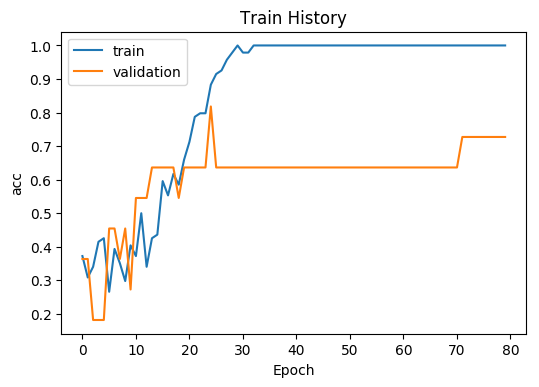

In [49]:
show_train_history(model_history,'acc','val_acc')

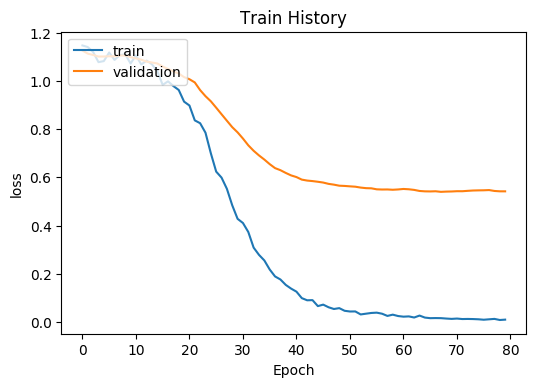

In [50]:
show_train_history(model_history,'loss','val_loss')

In [51]:
### 計算統計值 by 測試資料
# model = load_model(model_path)

y_predict_name, y_predict, y_predict_probability = predict_class(model, x_all)
predict_arr = []
for row in y_predict_probability:
    row_arr = []
    for item in row:
#         print(float_display(item))
        row_arr.append(float_display(item,4))
    predict_arr.append(row_arr)

predict_df = pd.DataFrame({'1_sentence':df_all.sentence,
                          '2_y_predict':y_predict,
                          '3_y_predict_name':y_predict_name,
                          '4_answer':y_all,
                          '5_answer_name':df_all.target,
                          '6_y_predict_probability':predict_arr})


answer = predict_df['4_answer']
predict =  predict_df['2_y_predict']

# 預測錯誤
print(predict_df[predict_df['2_y_predict'] != predict_df['4_answer']])

# confusion matrix
print(pd.crosstab(np.array(y_predict_name), np.array(df_all.target),
            rownames=['predict'], colnames=['answer']))

# 信心值過低踢除
predict_df['7_confuse'] = predict_df['6_y_predict_probability'].apply(lambda s: confuse_class(s, 0.8))
print(predict_df[predict_df['7_confuse']])

"""
accuracy.precision.recall.f1_score
"""
precision_score, recall_score, f1_score, support = precision_recall_fscore_support(answer, predict, average='macro')

print('test_precision: {0:0.2f}'.format(precision_score))
print('test_recall: {0:0.2f}'.format(recall_score))
print('test_f1_score: {0:0.2f}'.format(f1_score))

105/105 [==============================] - 0s 582us/step
    1_sentence  2_y_predict 3_y_predict_name  4_answer 5_answer_name  \
94          遲到            2          weather         0         leave   
96         擦防曬            0            leave         2       weather   
100         出差            2          weather         0         leave   

      6_y_predict_probability  
94   [0.1414, 0.3191, 0.5395]  
96   [0.4027, 0.2366, 0.3606]  
100   [0.1977, 0.2473, 0.555]  
answer   leave  phone  weather
predict                       
leave       33      0        1
phone        0     34        0
weather      2      0       35
    1_sentence  2_y_predict 3_y_predict_name  4_answer 5_answer_name  \
94          遲到            2          weather         0         leave   
95        降雨機率            2          weather         2       weather   
96         擦防曬            0            leave         2       weather   
100         出差            2          weather         0         leave   

      6_y_

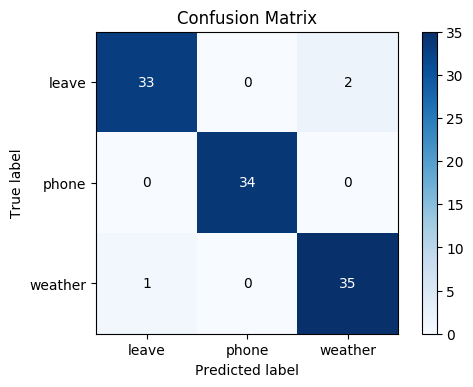

In [76]:
import scikitplot as skplt
skplt.metrics.plot_confusion_matrix(np.array(df_all.target), np.array(y_predict_name))

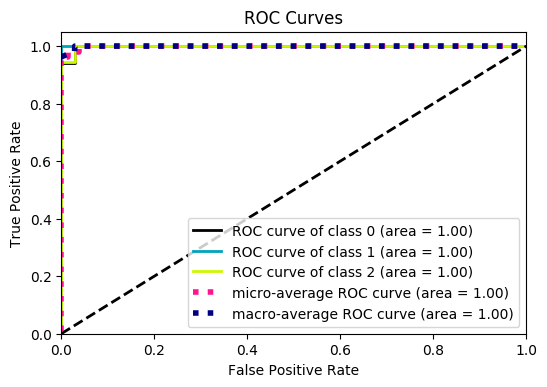

In [94]:
skplt.metrics.plot_roc(np.array(df_all.target_index), y_predict_probability)

In [125]:
from sklearn.metrics import classification_report
print('accuracy: ', 
      float(sum(np.array(df_all.target_index) == np.argmax(y_predict_probability, axis=1)))/ len(df_all))
print(classification_report(np.array(df_all.target_index), 
                            np.argmax(y_predict_probability, axis=1),
                            target_names=mapping_list
                           ))

('accuracy: ', 0.9714285714285714)
             precision    recall  f1-score   support

      leave       0.97      0.94      0.96        35
      phone       1.00      1.00      1.00        34
    weather       0.95      0.97      0.96        36

avg / total       0.97      0.97      0.97       105



In [52]:
model.save('{}.h5'.format('model/model_intent'))

In [53]:
# from keras.utils.vis_utils import plot_model
# plot_model(model, show_shapes=True,to_file='model.jpg')